<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
# Setting the viewing display to show all columns and up to 150 rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [4]:
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [5]:
house.shape

(1460, 81)

In [6]:
house['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

## From the MSZoning column values, we can see that 10 of the rows are for commercial properties. These should be dropped since we're only interested in residential properties.

In [7]:
house = house[house['MSZoning'] != 'C (all)']

house.shape

(1450, 81)

In [8]:
has_nulls = house.isnull().sum()
has_nulls = has_nulls[has_nulls > 0]

has_nulls

LotFrontage      259
Alley           1361
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      681
GarageType        79
GarageYrBlt       79
GarageFinish      79
GarageQual        79
GarageCond        79
PoolQC          1443
Fence           1172
MiscFeature     1398
dtype: int64

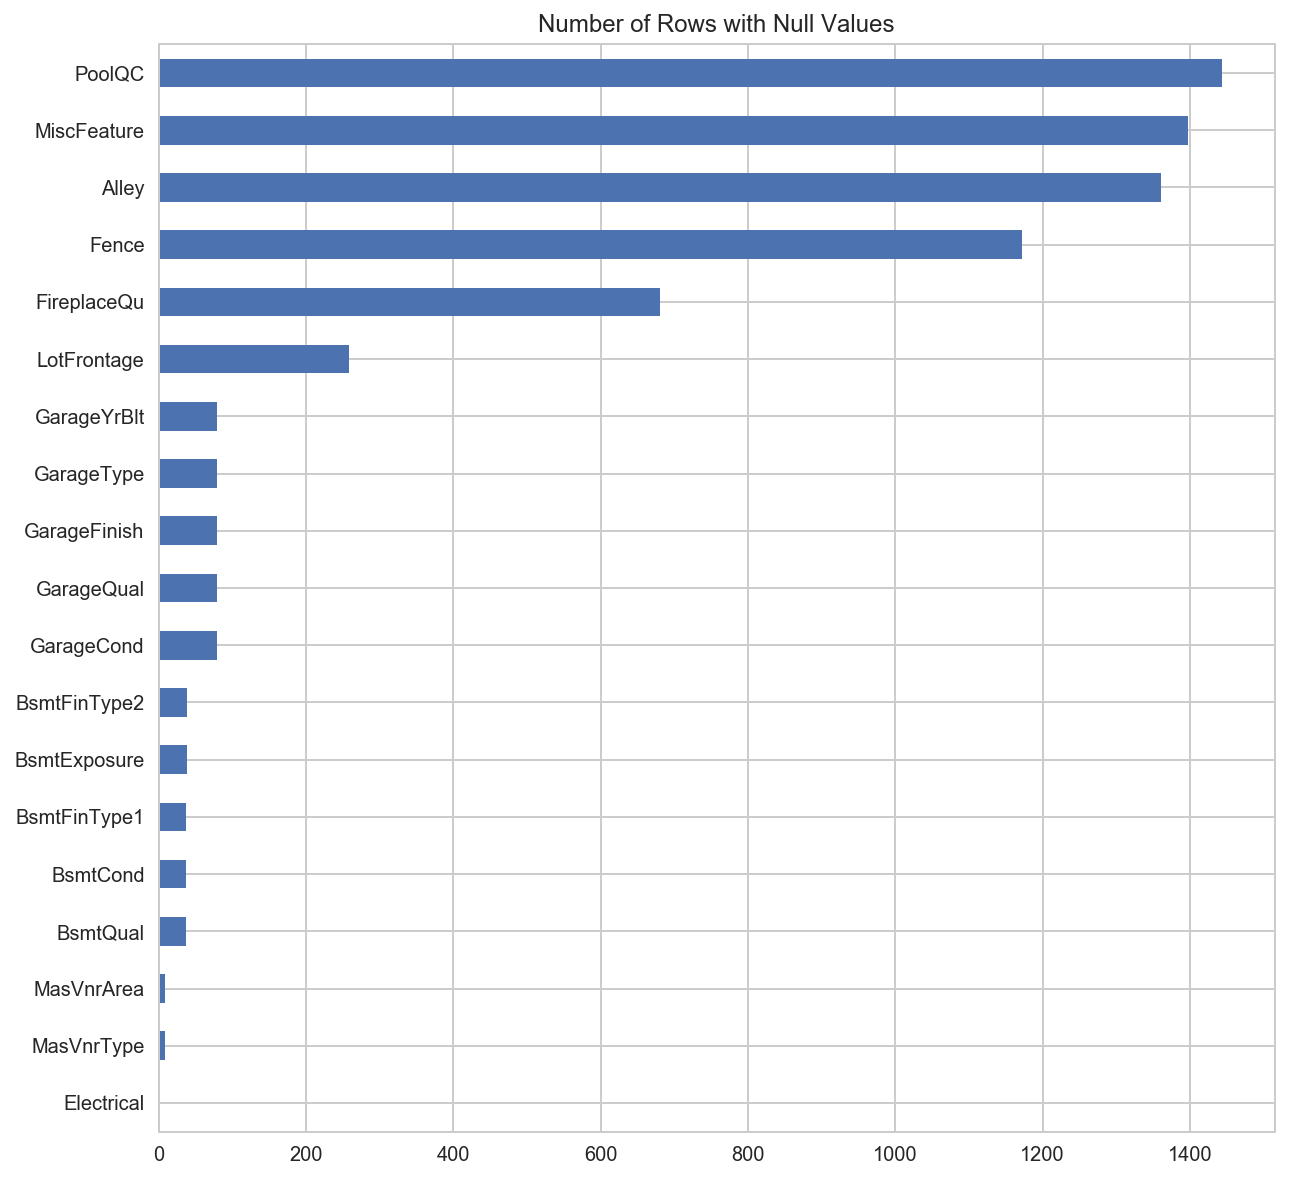

In [9]:
has_nulls.sort_values(inplace=True)

plt.figure()
has_nulls.plot.barh(title="Number of Rows with Null Values", figsize=(10,10))

In [10]:
house['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [11]:
# There are very few pool quality features, but they might be significant so I'll keep them.

In [12]:
# this will make sense later, but I put it here before filling in the nulls
qualitative = [f for f in house.columns if house.dtypes[f] == 'object']

### There are 259 rows that are missing the LotFrontage value. By looking at some of the corresponding LotArea values, they do seem to have edges fronting the street, so replacing the NaNs with 0's didn't seem like a good choice. I filled in the missing values with the average for that column to avoid dropping that many rows.

### The remaining null values seem to occur when that feature is not present at that property (e.g., GarageYrBlt is null when the property has no garage), so I filled those in with 0's.

In [13]:
house['LotFrontage'].fillna(int(np.mean(house['LotFrontage'])))

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7        70.0
8        51.0
9        50.0
10       70.0
11       85.0
12       70.0
13       91.0
14       70.0
15       51.0
16       70.0
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24       70.0
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
31       70.0
32       85.0
33       70.0
34       60.0
35      108.0
36      112.0
37       74.0
38       68.0
39       65.0
40       84.0
41      115.0
42       70.0
43       70.0
44       70.0
45       61.0
46       48.0
47       84.0
48       33.0
49       66.0
50       70.0
51       52.0
52      110.0
53       68.0
54       60.0
55      100.0
56       24.0
57       89.0
58       66.0
59       60.0
60       63.0
61       60.0
62       44.0
63       50.0
64       70.0
65       76.0
66       70.0
67       72.0
68       47.0
69       81.0
70       95.0
71       69.0
72    

In [14]:
house.fillna(0, inplace=True)

In [15]:
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


### Since there are so many object variables that are categorical, it makes sense to split the dataframe into two subsets, quantitative and qualitative for some further EDA.

In [16]:
# I found a link to the code in this cell and the next on kaggle.com. Seems useful for exploring distributions!
quantitative = [f for f in house.columns if house.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')


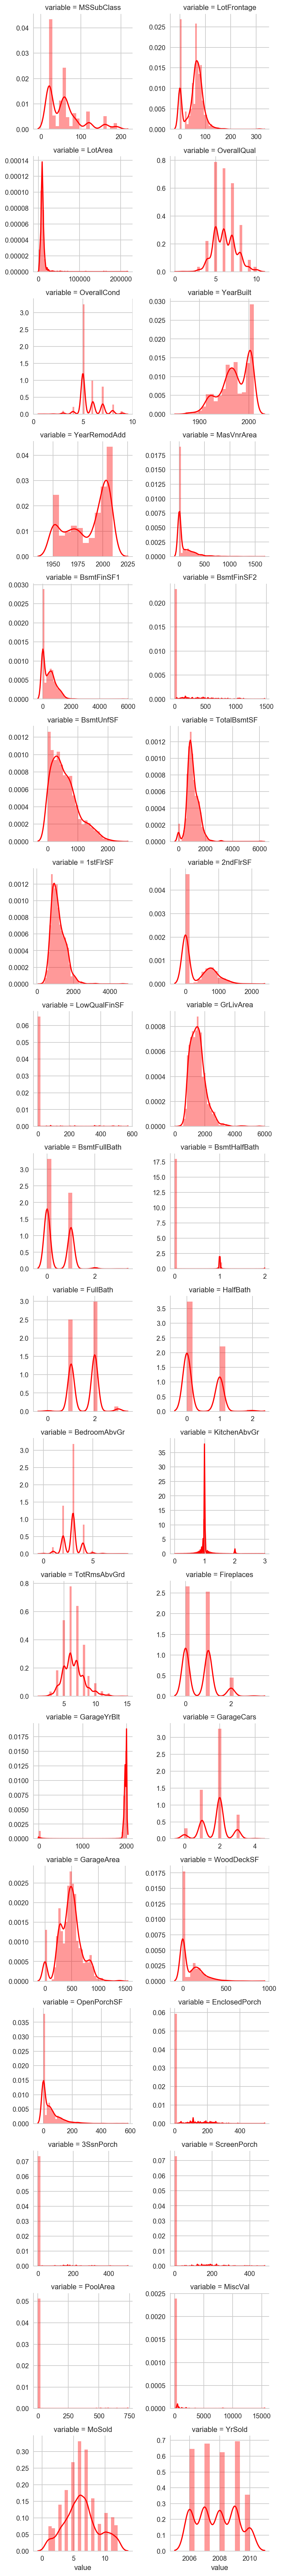

In [17]:
f = pd.melt(house, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", color="r")

In [18]:
# also adapted from code found here: https://www.kaggle.com/dgawlik/house-prices-eda

for c in qualitative:
    house[c] = house[c].astype('category')
    if house[c].isnull().any():
        house[c] = house[c].cat.add_categories(['MISSING'])
        house[c] = house[c].fillna('MISSING')


f = pd.melt(house, id_vars=['SalePrice'], value_vars=qualitative)

In [19]:
# adapted from boxplot code found at above site to creat violinplots

def violinplot(x, y, **kwargs):
    sns.violinplot(x=x, y=y)
    x=plt.xticks(rotation=90)

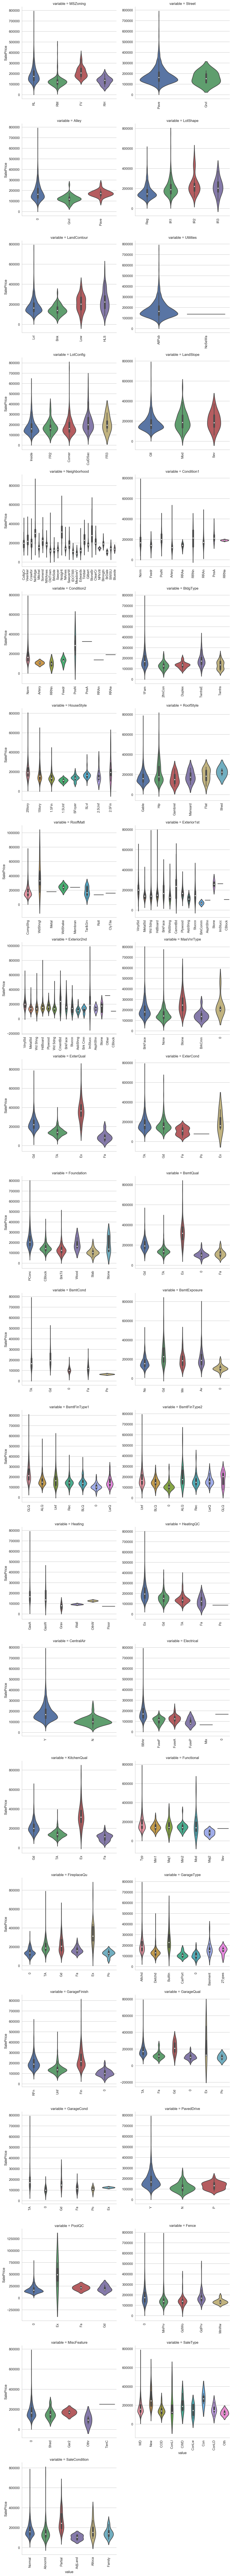

In [20]:
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(violinplot, "value", "SalePrice")

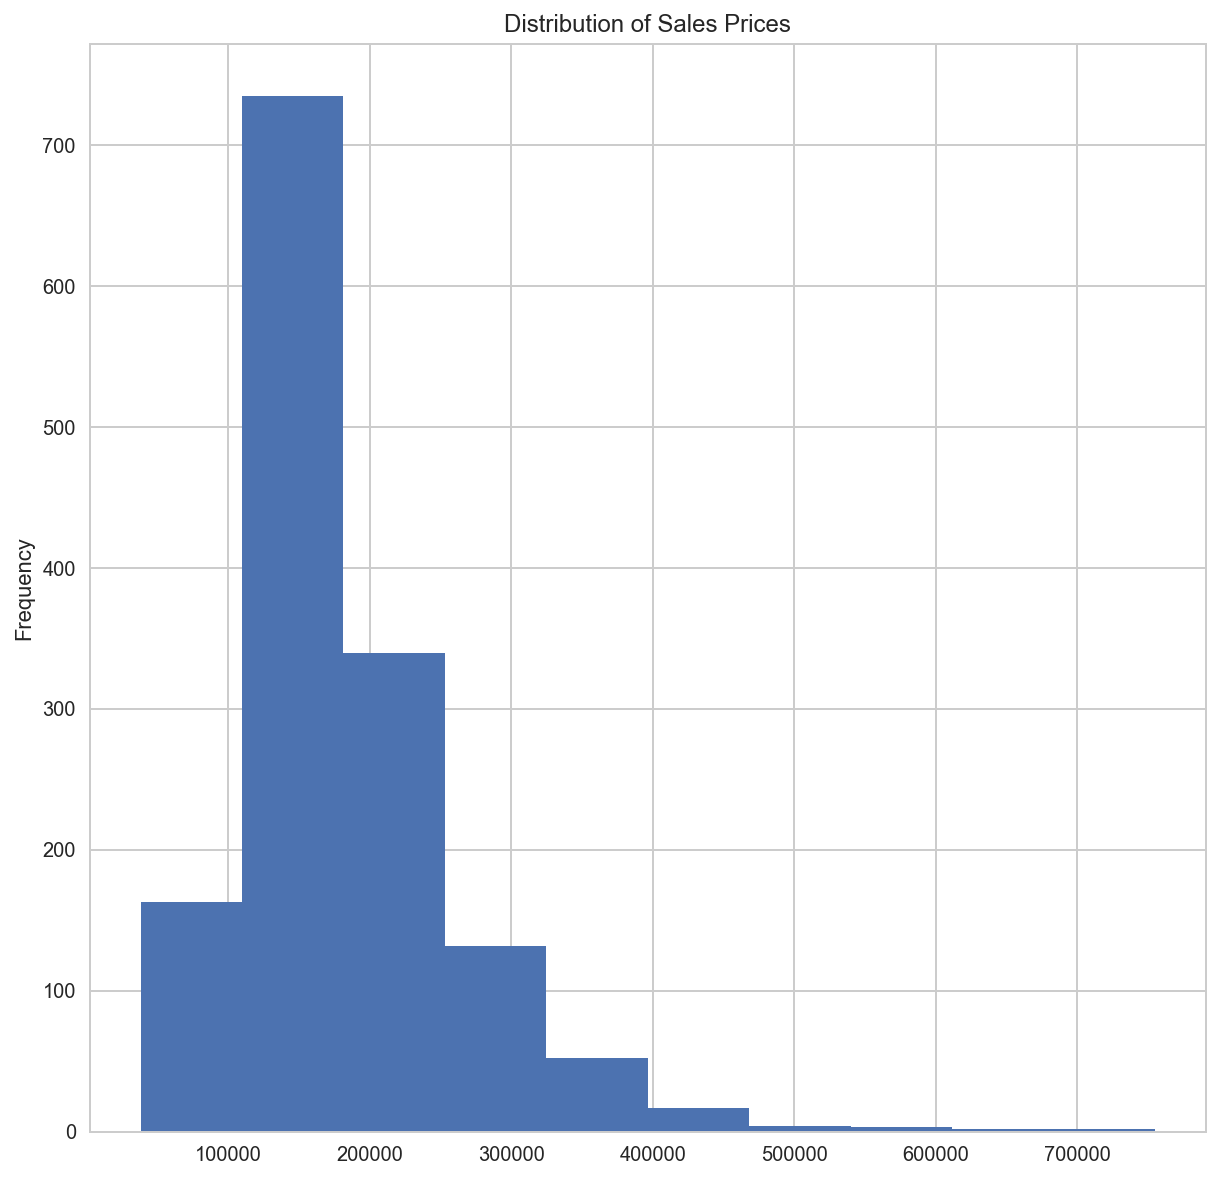

In [21]:
house['SalePrice'].plot.hist(title="Distribution of Sales Prices", figsize=(10,10))

### Since the distribution of sales prices is not normal, it should be log-transformed to normalize it.

In [22]:
house['LogPrice'] = house['SalePrice'].apply(np.log)

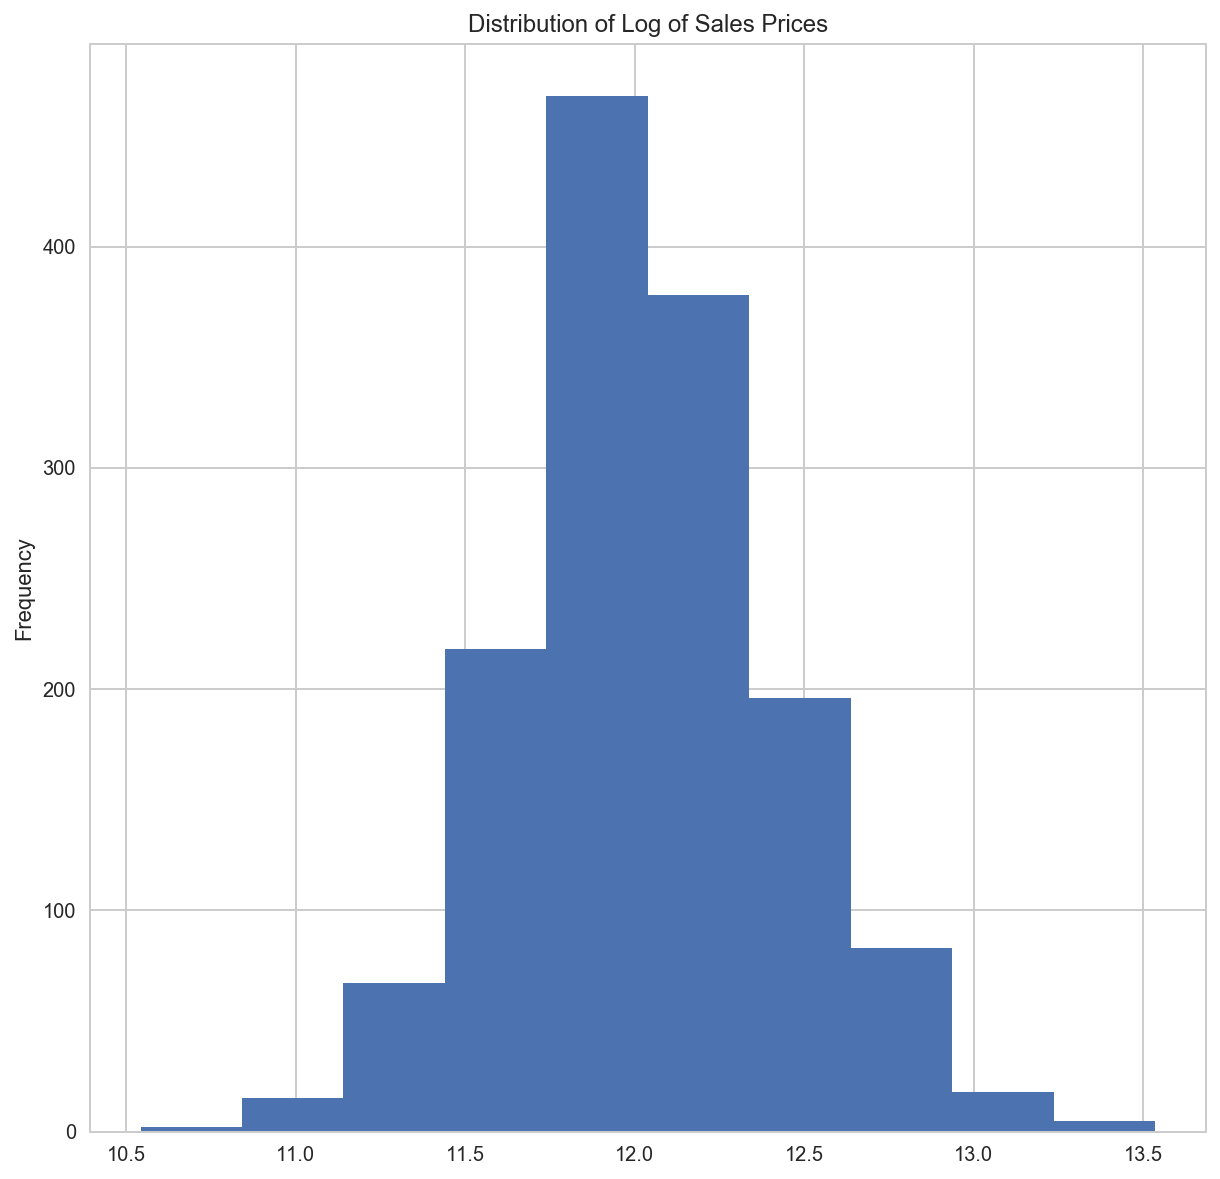

In [23]:
house['LogPrice'].plot.hist(title="Distribution of Log of Sales Prices", figsize=(10,10))

In [24]:
house.drop('SalePrice', axis=1, inplace=True)
house.drop('Id', axis=1, inplace=True)

In [25]:
house.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

In [26]:
# A heatmap would also be useful for exploring correlations.

house_quant = house[quantitative]
house_quant['LogPrice'] = house['LogPrice']
                    
house_quant.head()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LogPrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216


In [27]:
quant_corr = house_quant.corr()

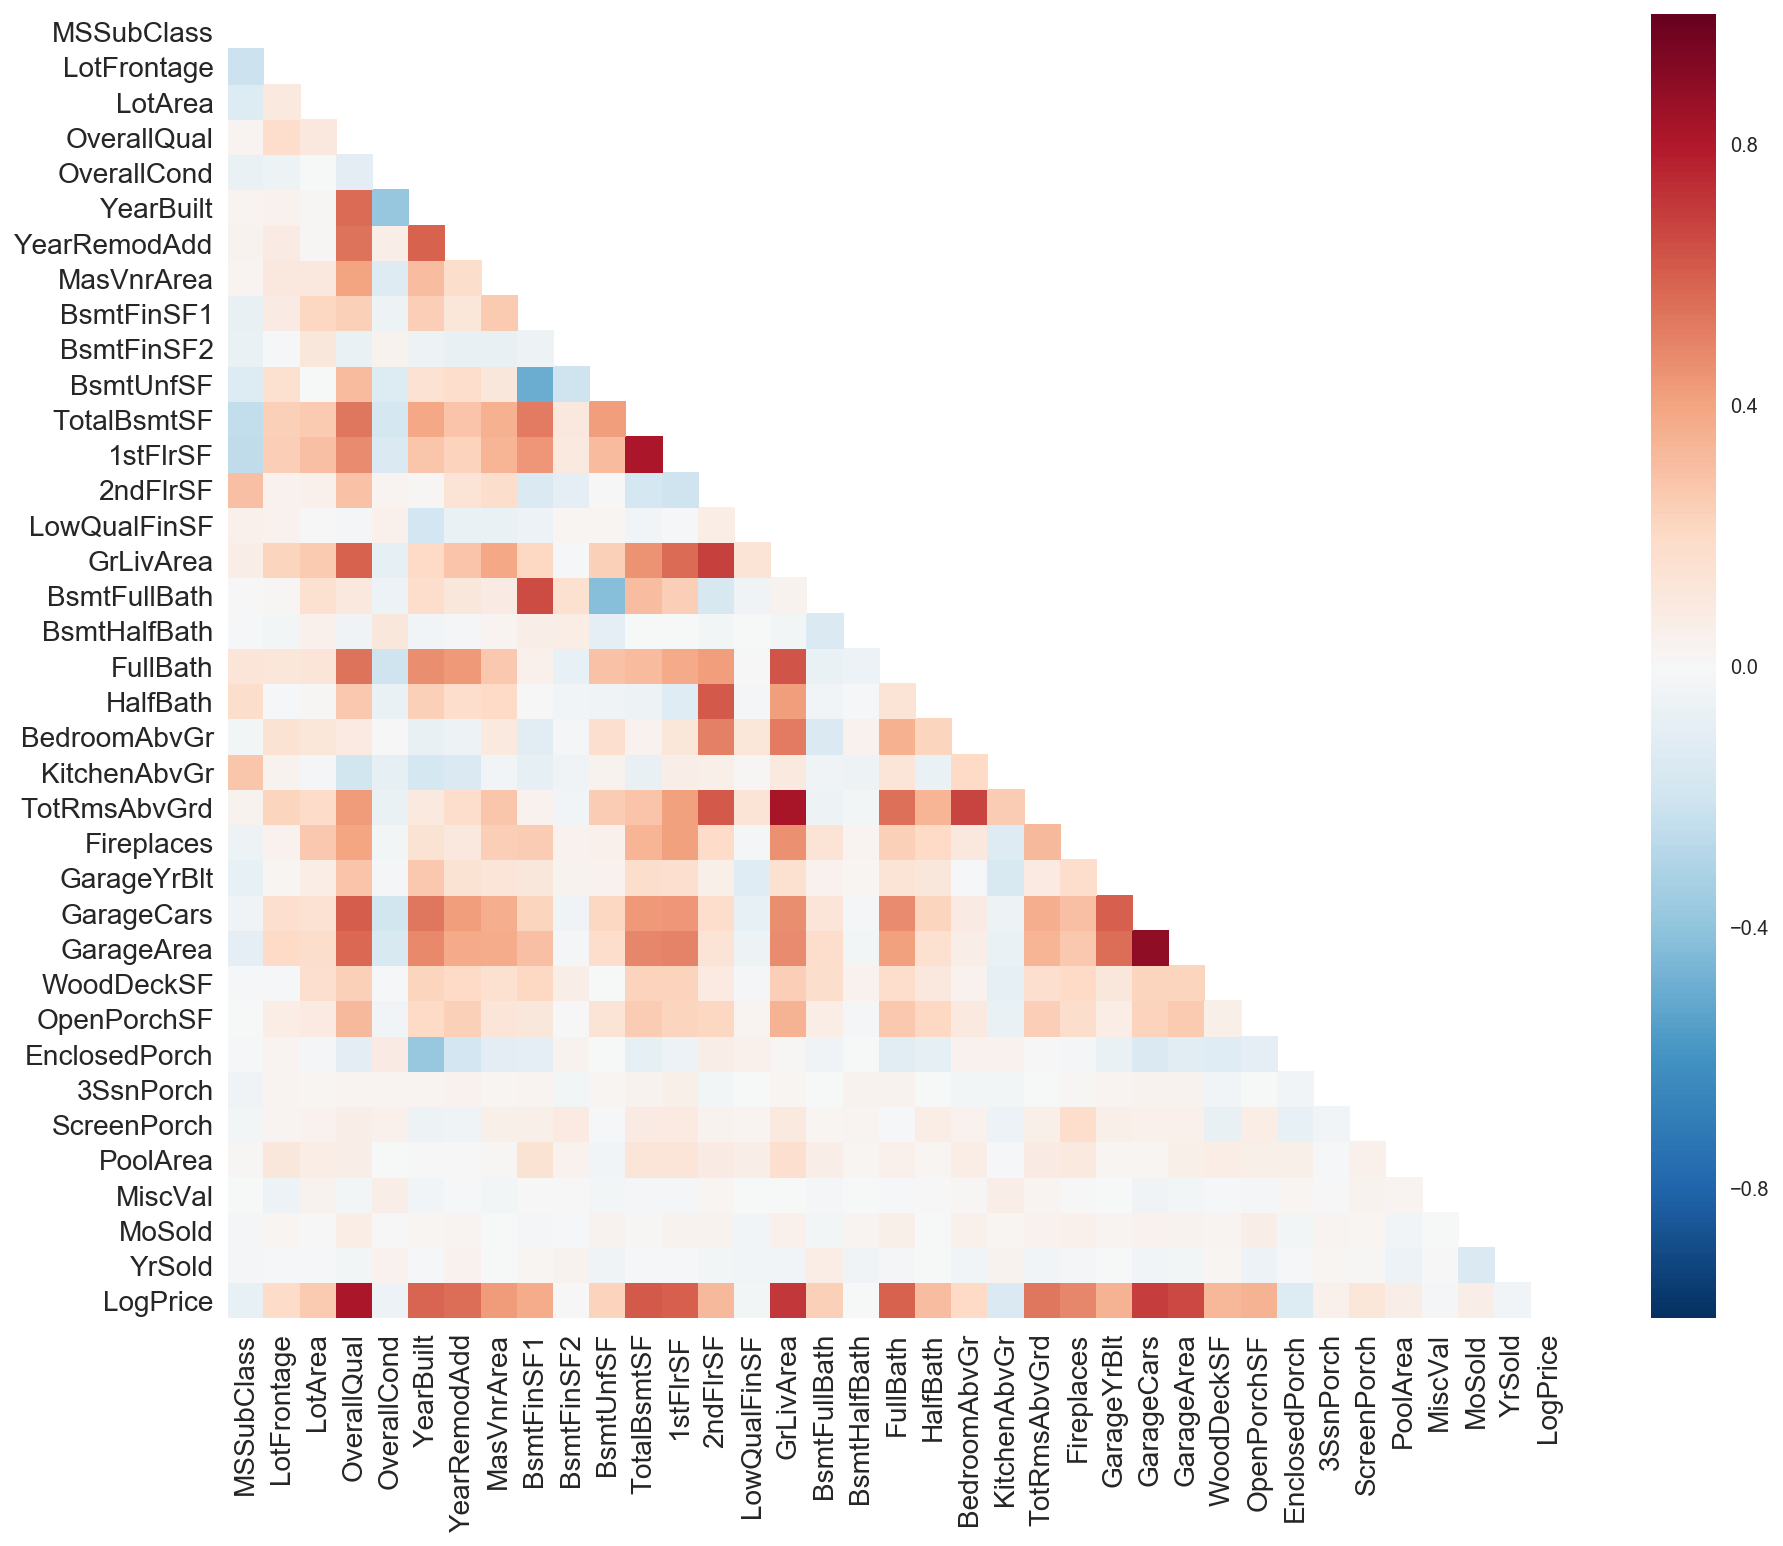

In [28]:
# Set the default matplotlib figure size to 11x9:
fix, ax = plt.subplots(figsize=(15,12))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(quant_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(quant_corr, mask=mask, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

### There are some highly correlated variables, so some should be eliminated before we run any models.

In [29]:
# 1stFlrSF and TotalBsmtSF are highly correlated as are GarageCars and GarageArea. I'll exlude one from each pair
# when I set up the models. I'll also exclude GrLivArea since that's the total of some of the other living  
# area square footage and room count measurements. BedroomaAbvGr is highly correlated with TotRmsAbvGrd, and the latter
# is more highly correlated with SalePrice, so I am excluding it, too.



### Of the remaining variables, some are fixed, and some are not. Since the current analysis only focuses on the fixed variables, I will split the DataFrame into fixed and not fixed subsets.

In [30]:
house.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

In [31]:
house.shape

(1450, 80)

In [32]:
house = house.rename(columns={'3SsnPorch':'ThreeSPorch', '1stFlrSF':'FirstFlrSF', '2ndFlrSF':'SecFlrSF'})


In [33]:
fixed_cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 
              'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'YearBuilt', 
              'YearRemodAdd', 'RoofStyle', 'Foundation', 'BsmtExposure', 'Heating', 'FirstFlrSF', 'SecFlrSF', 
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 
              'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ThreeSPorch', 
              'ScreenPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
              'LogPrice']

not_fixed_cols = ['OverallQual', 'OverallCond', 'Condition1', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                  'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 
                  'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', 'Electrical', 
                  'LowQualFinSF', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 
                  'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'LogPrice']

fixed = house[fixed_cols]
not_fixed = house[not_fixed_cols]

## Many of the predictors are categorical variables--both ordinal and cardinal--so I decided to use Patsy for modeling.

In [34]:
import patsy

In [35]:
y, X = patsy.dmatrices('LogPrice ~ MSSubClass + C(MSZoning) + LotFrontage + LotArea + C(Street) + C(Alley) + C(LotShape) + C(LandContour) + C(Utilities) + C(LotConfig) + C(LandSlope) + C(Neighborhood) + C(BldgType) + C(HouseStyle) + YearBuilt + YearRemodAdd + C(RoofStyle) + C(Foundation) + C(BsmtExposure) + C(Heating) + FirstFlrSF + SecFlrSF + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + TotRmsAbvGrd + Fireplaces + GarageYrBlt + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + ThreeSPorch + ScreenPorch + PoolArea + C(MiscFeature) + MiscVal + C(MoSold) + YrSold + C(SaleType) + C(SaleCondition)', data=fixed, return_type='dataframe')



In [36]:
X.shape

(1450, 127)

In [37]:
y.shape

(1450, 1)

In [38]:
X['YrSold'].value_counts()

2009.0    336
2007.0    328
2006.0    312
2008.0    302
2010.0    172
Name: YrSold, dtype: int64

In [39]:
X_train = X[house['YrSold'].isin([2006, 2007, 2008, 2009])]
X_test = X[house['YrSold'] == 2010]

y_train = y[house['YrSold'] != 2010]
y_test = y[house['YrSold'] == 2010]


In [40]:
X_train.shape

(1278, 127)

In [41]:
X_test.shape

(172, 127)

In [42]:
y_train.shape

(1278, 1)

In [43]:
y_test.shape

(172, 1)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.fit_transform(X_test)

In [46]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [47]:
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import GridSearchCV

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(Xs_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
yhat = lr.predict(Xs_test)

In [51]:
lr.score(Xs_test, y_test)

0.8629637066349416

### Trying out a Lasso regression:

In [52]:
lasso_reg = LassoCV(cv=5)

lasso_reg.fit(Xs_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [53]:
yhat_lasso = lasso_reg.predict(Xs_test)

In [54]:
lasso_reg.score(Xs_test, y_test)

0.89110094197430512

In [55]:
lasso_reg.coef_

array([  0.00000000e+00,  -6.68360111e-04,   0.00000000e+00,
        -1.29393579e-02,   7.33288487e-04,  -0.00000000e+00,
         2.81986017e-03,   3.61709014e-03,  -1.28997091e-02,
        -0.00000000e+00,   3.75644926e-03,  -0.00000000e+00,
         2.88827695e-03,  -1.72843446e-03,   1.03372636e-02,
        -3.33050522e-03,  -0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,  -6.19886973e-03,  -0.00000000e+00,
        -1.97452851e-03,   0.00000000e+00,   0.00000000e+00,
         8.25569302e-04,   3.01587431e-02,  -2.26781969e-02,
        -2.52095997e-03,  -5.15952945e-04,  -1.38538380e-02,
        -6.39379979e-03,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   2.40718475e-02,   4.29022016e-02,
        -7.49384221e-03,  -0.00000000e+00,  -8.71489163e-03,
         0.00000000e+00,   2.12271792e-02,   2.76545865e-02,
         4.78794268e-03,   7.08664809e-03,  -0.00000000e+00,
        -1.51097698e-02,  -9.71942002e-03,  -0.00000000e+00,
         3.43148024e-03,

### The Lasso penalty removed 50 of the 127 predictors, which is quite a few but not as many as I expected.

In [56]:
X_train.shape

(1278, 127)

### I was suspicious about the fact that so many variables were significant enough to make it into the model, so I constructed a Common Sense Model with only a few variables to see if it performed as well.
#### Common Sense Model: LotArea, YearBuilt, GrLivArea, BsmtFullBath+.5timesBsmtHalfBath+FullBath+.5timesHalfBath, Bedroom, GarageArea
#### As you can see below, it performed worse, with an r^2 value of 0.796. So, the model with more variables in it from the Lasso Regression is the best among those I tried.

In [57]:
# combining all of the bathroom values to create a single measure of how many bathrooms are in the house
house['Bathroom'] = house['BsmtFullBath'] + .5*house['BsmtHalfBath'] + house['FullBath'] + .5*house['HalfBath']

In [58]:
Xcs = house[['LotArea', 'YearBuilt', 'GrLivArea', 'Bathroom', 'BedroomAbvGr', 'GarageArea']]

In [59]:
Xcs_train = Xcs[house['YrSold'].isin([2006, 2007, 2008, 2009])]
Xcs_test = Xcs[house['YrSold'] == 2010]


In [60]:
Xcs_train.shape

(1278, 6)

In [61]:
Xcs_test.shape

(172, 6)

In [62]:
ss_cs = StandardScaler()
Xcss_train = ss_cs.fit_transform(Xcs_train)
Xcss_test = ss_cs.fit_transform(Xcs_test)

In [63]:
lr_cs = LinearRegression()
lr_cs.fit(Xcss_train, y_train)
yhat_cs = lr_cs.predict(Xcss_test)


In [64]:
lr_cs.score(Xcss_test, y_test)

0.79634502921093475

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [65]:
ss2 = StandardScaler()
Xs = ss2.fit_transform(X)

In [66]:
yhat_all = lasso_reg.predict(Xs)

In [67]:
house['yhat'] = yhat_all

In [68]:
house['residuals'] = house['yhat'] - house['LogPrice']

In [69]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogPrice,Bathroom,yhat,residuals
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,12.247694,3.5,12.205078,-0.042616
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,0,0,0,5,2007,WD,Normal,12.109011,2.5,12.160785,0.051774
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,0,0,0,9,2008,WD,Normal,12.317167,3.5,12.268179,-0.048988
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,0,0,0,2,2006,WD,Abnorml,11.849398,2.0,12.043609,0.194211
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,0,0,0,12,2008,WD,Normal,12.429216,3.5,12.613664,0.184448


In [70]:
y2, X2 = patsy.dmatrices('residuals ~ C(OverallQual) + C(OverallCond) + C(Condition1) + C(Condition2) + C(RoofMatl) + C(Exterior1st) + C(Exterior2nd) + C(MasVnrType) + MasVnrArea + C(ExterQual) + C(ExterCond) + C(BsmtQual) + C(BsmtCond) + C(BsmtFinType1) + BsmtFinSF1 + C(BsmtFinType2) + BsmtFinSF2 + BsmtUnfSF + C(HeatingQC) + C(CentralAir) + C(Electrical) + LowQualFinSF + C(KitchenQual) + C(Functional) + C(FireplaceQu) + C(GarageFinish) + C(GarageQual) + C(GarageCond) + C(PavedDrive) + C(PoolQC) + C(Fence)', data=house, return_type='dataframe')

# Recall:
# not_fixed_cols = ['OverallQual', 'OverallCond', 'Condition1', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
#                  'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 
#                  'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', 'Electrical', 
#                  'LowQualFinSF', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 
#                  'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'LogPrice']



In [71]:
X2.shape

(1450, 151)

In [72]:
y2.shape

(1450, 1)

In [73]:
ss3 = StandardScaler()
X2s = ss3.fit_transform(X2)

In [74]:
X2s.shape

(1450, 151)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2s, y2, test_size=0.2, random_state=1)

In [77]:
X2_train.shape

(1160, 151)

In [78]:
X2_test.shape

(290, 151)

In [79]:
y2_train.shape

(1160, 1)

In [80]:
y2_test.shape

(290, 1)

In [81]:
y2_train = np.ravel(y2_train)
y2_test = np.ravel(y2_test)

In [82]:
lasso2 = LassoCV(cv=5)
lasso2.fit(X2_train, y2_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [83]:
yhat2 = lasso2.predict(X2_test)

In [84]:
lasso2.score(X2_test, y2_test)

0.21115186250719464

In [85]:
lasso2.coef_

array([  0.00000000e+00,   0.00000000e+00,   7.94758208e-03,
         3.28947204e-03,   1.38830322e-03,  -0.00000000e+00,
        -0.00000000e+00,  -1.09835816e-03,  -1.31369268e-02,
        -0.00000000e+00,   0.00000000e+00,   1.03993330e-02,
         4.49374022e-03,   1.98834029e-03,  -0.00000000e+00,
        -7.16829388e-03,  -0.00000000e+00,  -4.48829320e-03,
         2.43132003e-03,  -4.74642501e-03,  -0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -1.54099765e-03,   1.27695962e-02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -5.79217629e-03,   0.00000000e+00,   1.59770068e-03,
        -1.26615090e-02,   0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,

### The Lasso regression zeroed out most of the predictors, but the r^2 value is only 0.211. Let's see if we can do better with a LinearRegression model.

In [86]:
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)
yhat2_lr = lr2.predict(X2_test)


In [87]:
lr2.score(X2_test, y2_test)

-1.2096896951483839e+27

### Negative r^2 value --> disaster!

# --------------------------------------------------

### Report:

#### 1. Evaluate the effect in dollars of the renovate-able features.
The renovate-able features of the house can only explain 0.211 of the residuals seen in the first model that matched fixed features with sales price. So, there is more going on here that we cannot explain with the models I have built. Renovation as a way to increase sales price seems reasonable, but there is a large margin of error and we cannot accurately predict how much certain renovations at certain costs will increase sales price.

#### 2. How would your company use this second model and its coefficients to determine whether they should buy a property or not?
My company would like to use the second model to identify renovate-able features that are worth improving in order to increase the sales price by identifiable amounts. The features that fell out of the model as insignificant are not worth investing in as far as improvements go, according to the model. The features with the highest coefficients are those that can have the greatest impact on sales price if we buy properties that score low on those features and improve them.

#### 3. Explain how the company can use the two models you have built to determine if they can make money.
The first model predicts the worth of a house, independent of the renovate-able features. So, if we can buy a property below the predicted value and renovate the significant features that tend to increase sales price for less than the amount we expect to gain according to the second model, then we can make money by purchasing, renovating, and selling that house.

#### 4. Investigate how much of the variance in price remaining is explained by these features.
Since almost 80% of the variance in price is due to features that are outside of the scope of the models, this is a highly risky business model.

#### 5. Do you trust your model? Should it be used to evaluate which properties to buy and fix up?
I cannot recommend trusting these models to evaluate which properties to buy and fix up. There is too much variance that is unexplained to make this a good business proposition.

# --------------------------------------------------

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [88]:
house = pd.concat([house, pd.get_dummies(house['SaleCondition'])], axis=1)

house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogPrice,Bathroom,yhat,residuals,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,12.247694,3.5,12.205078,-0.042616,0,0,0,0,1,0
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,0,0,0,5,2007,WD,Normal,12.109011,2.5,12.160785,0.051774,0,0,0,0,1,0
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,0,0,0,9,2008,WD,Normal,12.317167,3.5,12.268179,-0.048988,0,0,0,0,1,0
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,0,0,0,2,2006,WD,Abnorml,11.849398,2.0,12.043609,0.194211,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,0,0,0,12,2008,WD,Normal,12.429216,3.5,12.613664,0.184448,0,0,0,0,1,0


In [89]:
np.mean(house['Abnorml'])

0.06620689655172414

In [90]:
# Only 6-7% of the sales were abnormal. To give the model a better chance at predicting the abnormal sales, I'm
# oversampling the abnormal sales and adding them into the dataframe before modeling.

In [91]:
# oversampling
house_os = house.sample(n=1250, replace=True, weights='Abnorml', axis=0)

house_os.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogPrice,Bathroom,yhat,residuals,Abnorml,AdjLand,Alloca,Family,Normal,Partial
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,0,0,0,2,2006,WD,Abnorml,11.849398,2.0,12.043609,0.194211,1,0,0,0,0,0
942,90,RL,42.0,7711,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,3,1977,1977,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,1440,Unf,0,0,1440,GasA,TA,Y,SBrkr,1440,0,0,1440,2,0,2,0,4,2,TA,8,Typ,0,0,0,0.0,0,0,0,0,0,N,321,0,0,0,0,0,0,0,0,0,8,2007,Oth,Abnorml,11.918391,4.0,11.842059,-0.076332,1,0,0,0,0,0
1080,20,RL,80.0,11040,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1971,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,Gd,CBlock,TA,TA,No,ALQ,656,Unf,0,602,1258,GasA,Ex,Y,SBrkr,1258,0,0,1258,0,1,2,0,3,1,Gd,5,Typ,0,0,Attchd,1971.0,RFn,2,528,TA,TA,Y,55,0,0,216,0,0,0,0,0,0,10,2008,COD,Abnorml,11.884489,2.5,11.973749,0.089260,1,0,0,0,0,0
351,120,RL,0.0,5271,Pave,0,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1986,1986,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,1082,Unf,0,371,1453,GasA,Gd,Y,SBrkr,1453,0,0,1453,1,0,1,1,2,1,Gd,6,Typ,1,TA,Attchd,1986.0,RFn,2,445,TA,TA,Y,0,80,0,0,184,0,0,0,0,0,12,2006,WD,Abnorml,12.154779,2.5,12.155567,0.000788,1,0,0,0,0,0
91,20,RL,85.0,8500,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,3,1961,1961,Hip,CompShg,HdBoard,HdBoard,BrkCmn,203.0,TA,TA,CBlock,TA,TA,No,Rec,600,Unf,0,635,1235,GasA,TA,Y,SBrkr,1235,0,0,1235,0,0,1,0,2,1,TA,6,Typ,0,0,Attchd,1961.0,Unf,2,480,TA,TA,Y,0,0,0,0,0,0,0,GdWo,0,0,12,2006,WD,Abnorml,11.498827,1.0,11.739321,0.240495,1,0,0,0,0,0
925,20,RL,0.0,15611,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,5,6,1977,1977,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,ALQ,767,LwQ,93,266,1126,GasA,TA,Y,SBrkr,1126,0,0,1126,0,1,2,0,3,1,Ex,6,Typ,0,0,Attchd,1977.0,RFn,2,540,TA,TA,Y,180,0,0,0,0,0,0,0,0,0,3,2008,WD,Abnorml,12.072541,2.5,11.947048,-0.125493,1,0,0,0,0,0
1131,20,RL,63.0,10712,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1991,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Mn,BLQ,212,Unf,0,762,974,GasA,TA,Y,SBrkr,974,0,0,974,0,0,1,0,3,1,TA,5,Typ,0,0,0,0.0,0,0,0,0,0,Y,0,28,0,0,0,0,0,MnPrv,0,0,9,2007,Oth,Abnorml,11.445717,1.0,11.645862,0.200145,1,0,0,0,0,0
197,75,RL,174.0,25419,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,0,0,3,2006,WD,Abnorml,12.367341,3.5,12.296680,-0.070661,1,0,0,0,0,0
144,90,RM,70.0,9100,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,Duplex,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,BrkFace,336.0,TA,TA,CBlock,TA,TA,No,Rec,1332,Unf,0,396,1728,GasA,TA,Y,SBrkr,1728,0,0,1728,1,0,2,0,6,2,TA,10,Typ,0,0,D

In [92]:
house_os.shape

(1250, 89)

In [93]:
house.shape

(1450, 89)

In [94]:
# adding the oversampled rows to the original rows
df = pd.concat([house, house_os], axis=0)

In [95]:
df.shape

(2700, 89)

In [96]:
y3 = df['Abnorml'].values

In [97]:
df = pd.concat([df[fixed_cols], df[not_fixed_cols], df['Abnorml']], axis=1)

In [98]:
df.drop('SaleCondition', axis=1, inplace=True)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,Foundation,BsmtExposure,Heating,FirstFlrSF,SecFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,HalfBath,TotRmsAbvGrd,Fireplaces,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,LogPrice,OverallQual,OverallCond,Condition1,Condition2,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,LowQualFinSF,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,LogPrice,Abnorml
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,2003,2003,Gable,PConc,No,GasA,856,854,1,0,2,1,1,8,0,0,2003.0,548,0,61,0,0,0,0,0,0,2,2008,WD,12.247694,7,5,Norm,Norm,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Gd,TA,GLQ,706,Unf,0,150,Ex,Y,SBrkr,0,Gd,Typ,0,RFn,TA,TA,Y,0,0,12.247694,0
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,1Fam,1Story,1976,1976,Gable,CBlock,Gd,GasA,1262,0,0,1,2,0,0,6,1,1,1976.0,460,298,0,0,0,0,0,0,0,5,2007,WD,12.109011,6,8,Feedr,Norm,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Gd,TA,ALQ,978,Unf,0,284,Ex,Y,SBrkr,0,TA,Typ,TA,RFn,TA,TA,Y,0,0,12.109011,0
2,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,2001,2002,Gable,PConc,Mn,GasA,920,866,1,0,2,1,1,6,1,1,2001.0,608,0,42,0,0,0,0,0,0,9,2008,WD,12.317167,7,5,Norm,Norm,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Gd,TA,GLQ,486,Unf,0,434,Ex,Y,SBrkr,0,Gd,Typ,TA,RFn,TA,TA,Y,0,0,12.317167,0
3,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,1Fam,2Story,1915,1970,Gable,BrkTil,No,GasA,961,756,1,0,1,0,0,7,1,1,1998.0,642,0,35,272,0,0,0,0,0,2,2006,WD,11.849398,7,5,Norm,Norm,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,TA,Gd,ALQ,216,Unf,0,540,Gd,Y,SBrkr,0,Gd,Typ,Gd,Unf,TA,TA,Y,0,0,11.849398,1
4,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,1Fam,2Story,2000,2000,Gable,PConc,Av,GasA,1145,1053,1,0,2,1,1,9,1,1,2000.0,836,192,84,0,0,0,0,0,0,12,2008,WD,12.429216,8,5,Norm,Norm,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Gd,TA,GLQ,655,Unf,0,490,Ex,Y,SBrkr,0,Gd,Typ,TA,RFn,TA,TA,Y,0,0,12.429216,0


In [99]:
df.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'BldgType', u'HouseStyle', u'YearBuilt',
       u'YearRemodAdd', u'RoofStyle', u'Foundation', u'BsmtExposure',
       u'Heating', u'FirstFlrSF', u'SecFlrSF', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'HalfBath', u'TotRmsAbvGrd',
       u'Fireplaces', u'Fireplaces', u'GarageYrBlt', u'GarageArea',
       u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch', u'ThreeSPorch',
       u'ScreenPorch', u'PoolArea', u'MiscFeature', u'MiscVal', u'MoSold',
       u'YrSold', u'SaleType', u'LogPrice', u'OverallQual', u'OverallCond',
       u'Condition1', u'Condition2', u'RoofMatl', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'MasVnrArea', u'ExterQual',
       u'ExterCond', u'BsmtQual', u'BsmtCond', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'

In [100]:
df.shape

(2700, 77)

In [101]:
y3, X3 = patsy.dmatrices('Abnorml ~ MSSubClass + C(MSZoning) + LotFrontage + LotArea + C(Street) + C(Alley) + C(LotShape) + C(LandContour) + C(Utilities) + C(LotConfig) + C(LandSlope) + C(Neighborhood) + C(BldgType) + C(HouseStyle) + YearBuilt + YearRemodAdd + C(RoofStyle) + C(Foundation) + C(BsmtExposure) + C(Heating) + FirstFlrSF + SecFlrSF + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + TotRmsAbvGrd + Fireplaces + GarageYrBlt + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + ThreeSPorch + ScreenPorch + PoolArea + C(MiscFeature) + MiscVal + C(MoSold) + YrSold + C(SaleType) + C(OverallQual) + C(OverallCond) + C(Condition1) + C(Condition2) + C(RoofMatl) + C(Exterior1st) + C(Exterior2nd) + C(MasVnrType) + MasVnrArea + C(ExterQual) + C(ExterCond) + C(BsmtQual) + C(BsmtCond) + C(BsmtFinType1) + BsmtFinSF1 + C(BsmtFinType2) + BsmtFinSF2 + BsmtUnfSF + C(HeatingQC) + C(CentralAir) + C(Electrical) + LowQualFinSF + C(KitchenQual) + C(Functional) + C(FireplaceQu) + C(GarageFinish) + C(GarageQual) + C(GarageCond) + C(PavedDrive) + C(PoolQC) + C(Fence) + LogPrice', data=df, return_type='dataframe')

In [102]:
# for comparison, here's a patsy formula that worked:
# y2, X2 = patsy.dmatrices('residuals ~ C(OverallQual) + C(OverallCond) + C(Condition1) + C(Condition2) + C(RoofMatl) + C(Exterior1st) + C(Exterior2nd) + C(MasVnrType) + MasVnrArea + C(ExterQual) + C(ExterCond) + C(BsmtQual) + C(BsmtCond) + C(BsmtFinType1) + BsmtFinSF1 + C(BsmtFinType2) + BsmtFinSF2 + BsmtUnfSF + C(HeatingQC) + C(CentralAir) + C(Electrical) + LowQualFinSF + C(KitchenQual) + C(Functional) + C(FireplaceQu) + C(GarageFinish) + C(GarageQual) + C(GarageCond) + C(PavedDrive) + C(PoolQC) + C(Fence)', data=house, return_type='dataframe')


In [126]:
X3_train = X3[df['YrSold'].isin([2006, 2007, 2008, 2009])]
X3_test = X3[df['YrSold'] == 2010]

y3_train = y3[df['YrSold'] != 2010]
y3_test = y3[df['YrSold'] == 2010]


In [127]:
X3_train.shape

(2403, 274)

In [128]:
X3_test.shape

(297, 274)

In [129]:
ss4 = StandardScaler()
X3_train = ss4.fit_transform(X3_train)
X3_test = ss4.fit_transform(X3_test)

In [130]:
y3_train = np.ravel(y3_train)
y3_test = np.ravel(y3_test)

In [131]:
y3_train.shape

(2403,)

In [132]:
y3_test.shape

(297,)

In [114]:
from sklearn.linear_model import LogisticRegressionCV

In [133]:
log_reg = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear')

In [134]:
log_reg.fit(X3_train, y3_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [135]:
log_reg.score(X3_test, y3_test)

0.56902356902356899

In [136]:
log_reg.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l1',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0}

In [138]:
coeffs = log_reg.coef_

In [145]:
# "Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors 
# of abnormal sales."

coef_df = pd.DataFrame({
        'coef':log_reg.coef_[0],
        'feature':X3.columns
    })

coef_df['abs_coef'] = np.abs(coef_df.coef)

# sort by absolute value of coefficient (magnitude)
coef_df.sort_values('abs_coef', ascending=False, inplace=True)

# Show non-zero coefs and predictors
coef_df[coef_df.coef != 0]

coef_df

,coef,feature,abs_coef
242,34.738186,MSSubClass,34.738186
47,-20.473224,C(BldgType)[T.TwnhsE],20.473224
44,-17.826164,C(BldgType)[T.2fmCon],17.826164
172,-16.853328,C(ExterCond)[T.Fa],16.853328
66,-16.022582,C(BsmtExposure)[T.Gd],16.022582
10,-13.558565,C(LandContour)[T.HLS],13.558565
46,-13.235594,C(BldgType)[T.Twnhs],13.235594
169,12.952731,C(ExterQual)[T.Fa],12.952731
272,-12.667093,LogPrice[0],12.667093
273,-12.662513,LogPrice[1],12.662513


#### In the table above, you can see which variables have the greatest predictive power on abnormal sales. The abs_coef column displays the magnitude of the impact and the sign on the coef shows whether that impact is positive or negative.